In [1]:
# all the required python packages

import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install pyvis
!{sys.executable} -m pip install node2vec
!{sys.executable} -m pip install clusteval

# Problem Statement
This project aims to harness the power of machine learning techniques to delve into the intricate world of graph analysis, specifically focusing on clustering based on the local properties of nodes. The primary objective is to discern and group nodes within a given graph that exhibit shared structural properties, thus uncovering cohorts of individuals with similar characteristics or interests. This endeavour holds tremendous potential across various domains, be it for targeted marketing endeavours, community detection initiatives, or the deeper comprehension of complex social dynamics.

In this project, we will utilize one of the social networks from the [Stanford SNAP](https://snap.stanford.edu/data/#socnets)] repository, which provides a collection of real-world network datasets. We will use the [Facebook dataset](https://snap.stanford.edu/data/ego-Facebook.html) for this project.

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. For this exercise, we will be utilizing the graph network created from the [edges](https://snap.stanford.edu/data/facebook_combined.txt.gz) from all egonets combined. Each row denotes relation between participants denoted by integer. Here are the first 10 rows of the file where '1'-'10' participants are part of participant '0' circle.

```
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
```

In this project, our focus solely lies on understanding the interplay between nodes (participants) within their local context. We will use engineered features derived from the neighbourhood of the nodes within a range of 2-3 hops. The objective is to employ clustering algorithms on these features to uncover relationships between nodes, identifying patterns, similarities, and potential connections. 


# Introduction

Traditional machine learning requires feature design which is a set independent variables (either continous or categorical) which attempts to represent the input data. These features are fed into the ML algorithms to build/train model which can be used to predict/classify the test/new data. 

The features across the input data (of size n) is represented as dxn matrix where d is number of features/dimensions. Inorder to apply Traditional ML on the graph network data, appropriate methods needs to employed to get the feature set which can better describe the network - node level features, edge level features, set of nodes level features and entire graph level features.  (ref: [ML in graphs](https://www.youtube.com/watch?v=rMq21iY61SE&list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn&index=7&ab_channel=StanfordOnline) )

Traditionaly we have hand picked features that describe the graph e.g. degree, centrality, clustering cofficient, etc.. but its a tideous effort and require expert domain knwowledge to handpick informative, discriminating, and independent features (ref: [node2vec](https://arxiv.org/pdf/1607.00653.pdf) ). Representation Learning algorithms attempt to automate the feature extraction from the graph independent of the downstream prediction/classification tasks (ref: [ML in graphs](https://www.youtube.com/watch?v=rMq21iY61SE&list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn&index=7&ab_channel=StanfordOnline) ). The algorithms encode the network into a d-dimensional vector space (referred to as node embedding space). Over the years there are multiple algorithms (Matrix Factorization based, Random Walk based, Deep Learning based, etc..) published to estimate the embeddings to best represent the network  [ref: [Graph Embedding Techniques](https://www.arxiv-vanity.com/papers/1705.02801/) ]. 

In this notebook I will use node2vec algorithm to generate the features/embeddings. As per the [paper](https://arxiv.org/pdf/1607.00653.pdf) this algorithm is built on random walks and it exposes parameters (p, q, r, l, d) which can be adjusted to different kinds of domains & data sizes. p & q parameters introduce bias in random walks - BFS vs DFS. I will run the clustering algorithms - KMeans, AgglomerativeClustering and DBSCAN on features extracted from node2vec alogrithm and evaluate the clustering using the metrics - Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index. I will leverage t-SNE technique to visualize the clusters on scatter plot. 


I tried out the above pipeline on a smaller dataset  - [Les-Miserables](https://github.com/MADStudioNU/lesmiserables-character-network/blob/master/parsed_data/jean-complete-node.csv) which I summarized the findings in the section "Les-Miserables". Being a small dataset I could visualize the clusters over the graph to better understand node2vec algo and clustering as such. 


The notebook is structured as follows 
- Les-Miserables: summarize the findings using visuals on smaller dataset
- Utilities: python code which will be used across the notebook
- Graph: build graph on facebook dataset and check few properties
- Node2Vec: short intro into node2vec & check few node similarities
- Apply ML clustering methods: apply k-means, dbscan, hierarchial
- Conclusion
- Future

Notes:
- I only used ecludian distance, not sure if this usecase has the curse of high dimensionality [ref:](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

# Les-Miserables

#### About Les-Miserables
Its a play where the actors co-apperance has been captured in the dataset. The dataset contains the number of co-apperance occurrence (as edge weight) between actor pairs but I excluded it (the weights) to be similar to facebook dataset.

https://github.com/MADStudioNU/lesmiserables-character-network/blob/master/parsed_data/jean-complete-node.csv


#### Grid Search results
Below table summarizes the top 5 grid searches based on silhouette score. The params included n_clusters: 2 to 50, node2vec params p (0.5, 1) & q (0.25 to 4)

KMeans |  Hierachial | DBSCAN
:-------------------------:|:-------------------------:|:-------------------------:
[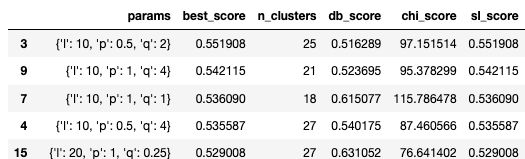](attachment:image-3.png) | [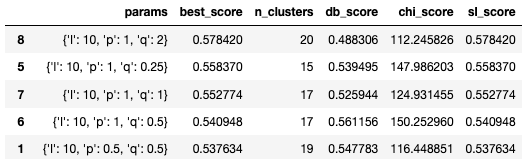](attachment:image-10.png) |  [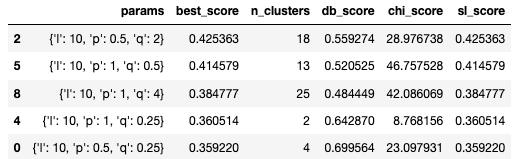](attachment:image-8.png)



#### Visualize the data with clusters
Below table provided visualization of clustering on the graph. I chose p (0.5, 1) to keep the neighborhood local and spaned q from 0.25 to 4 to check both DFS and BFS.

- node sizes vary based on their degree centrality measure
- node colors vary based on the cluster they belong to

KMeans (p1, q4) |  KMeans(p1, q1)
:-------------------------:|:-------------------------:
[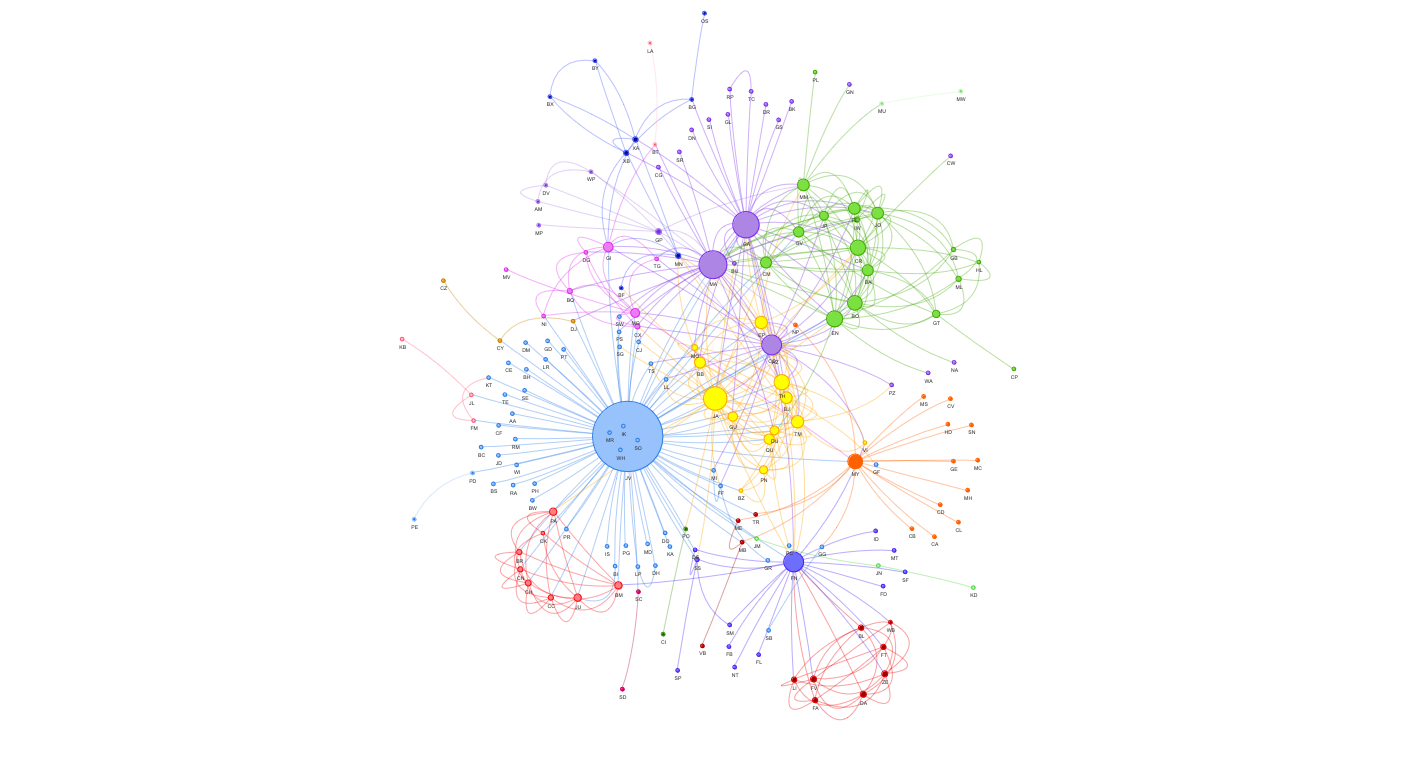](attachment:image-4.png) | [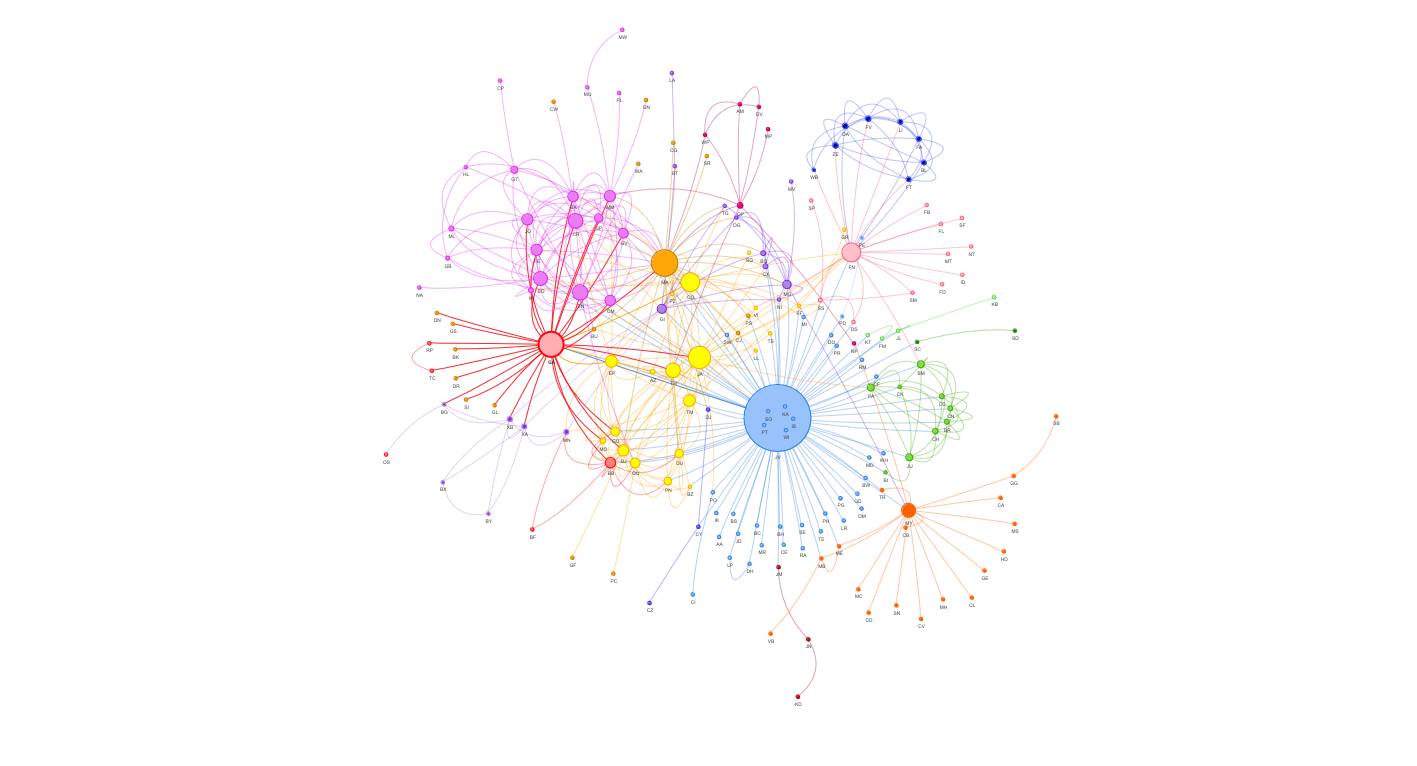](attachment:image-5.png)


DBSCAN (p1, q4) |  DBSCAN (p1, q0.5)
:-------------------------:|:-------------------------:
[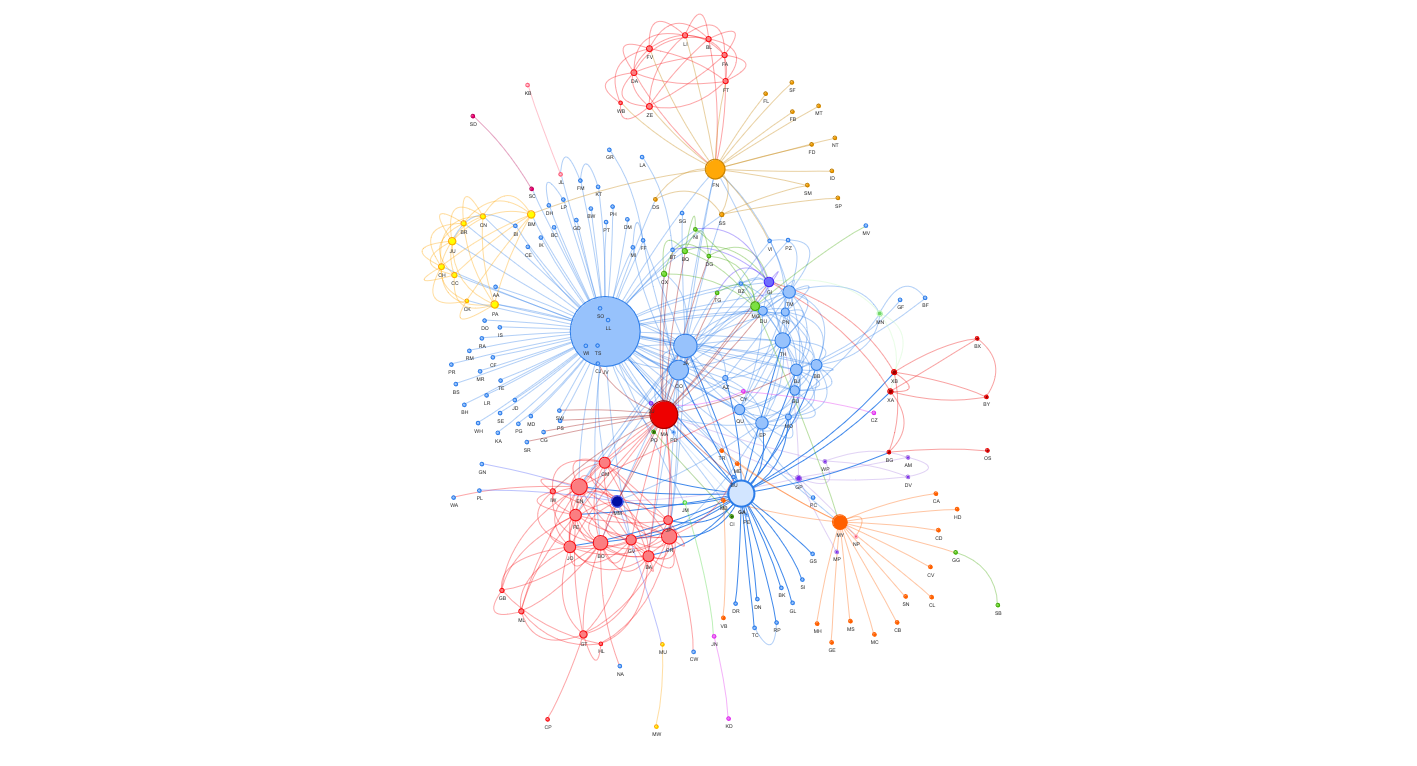](attachment:image.png) | [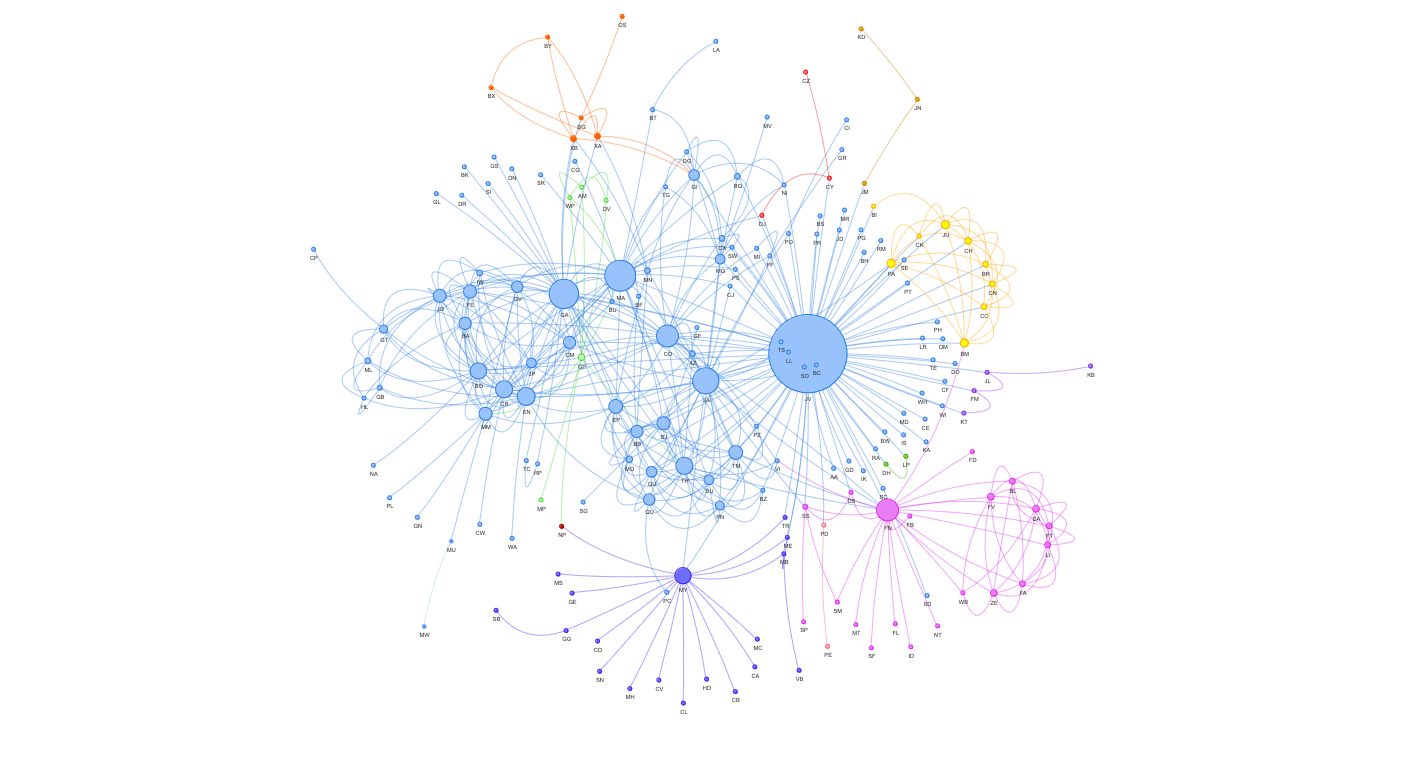](attachment:image-9.png)

Hierachial (p1, q2) |  Hierachial (p1, q0.25)
:-------------------------:|:-------------------------:
[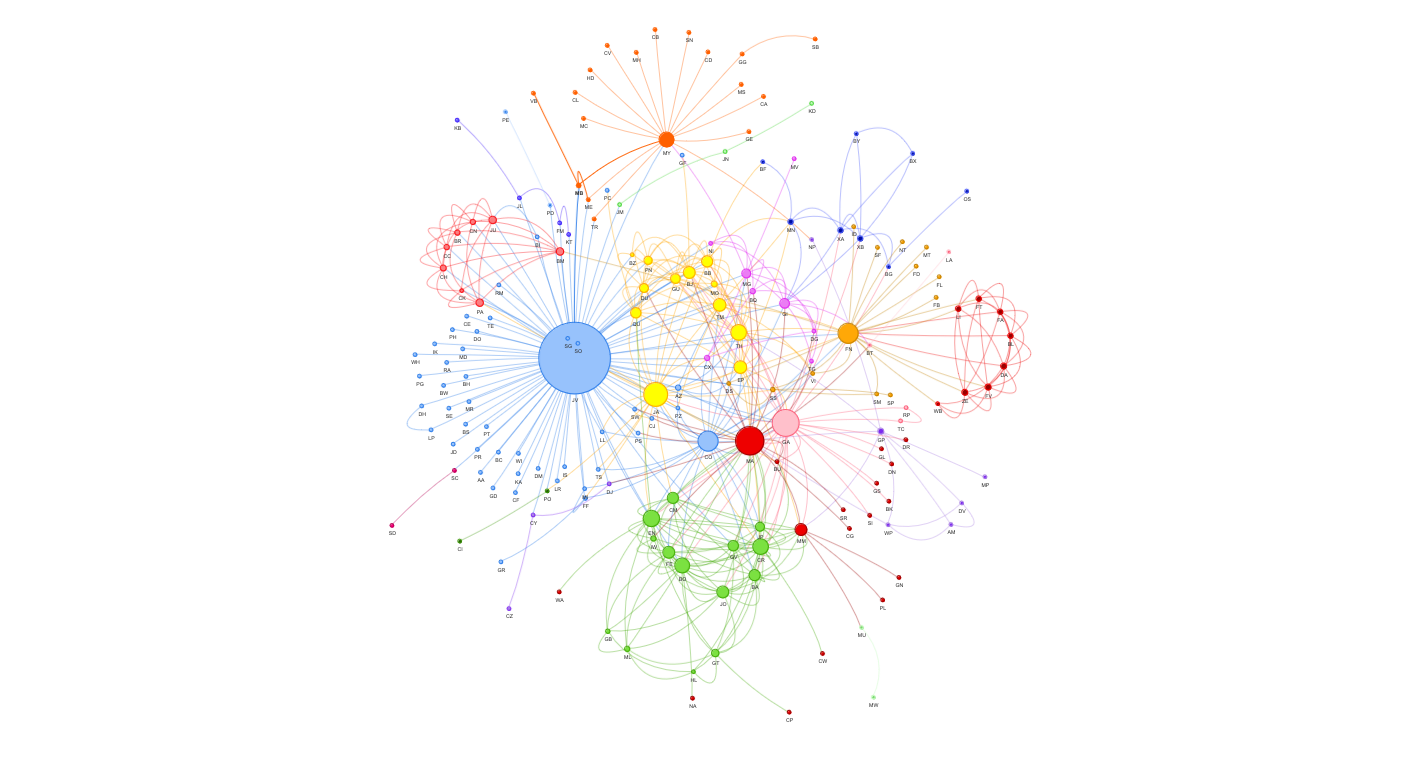](attachment:image-2.png) | [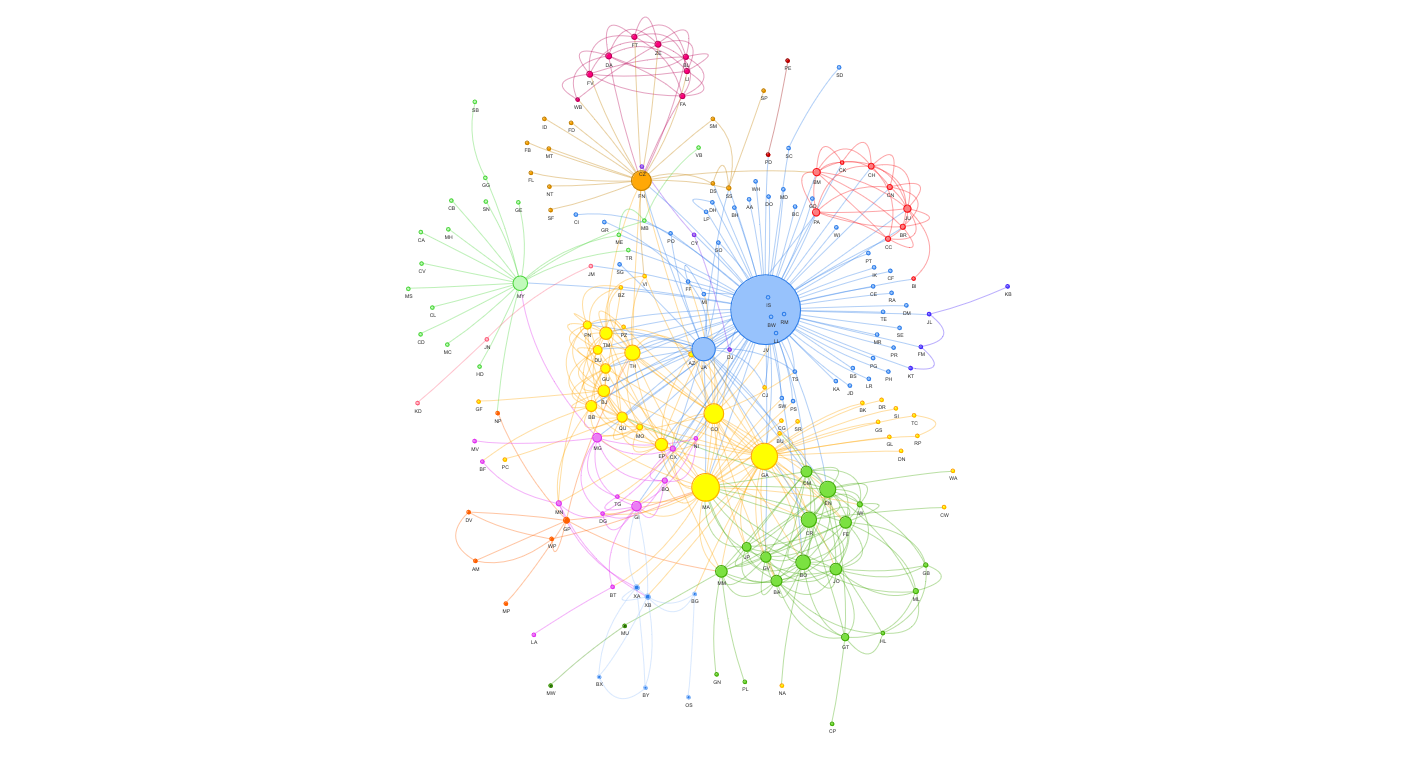](attachment:image-7.png)
[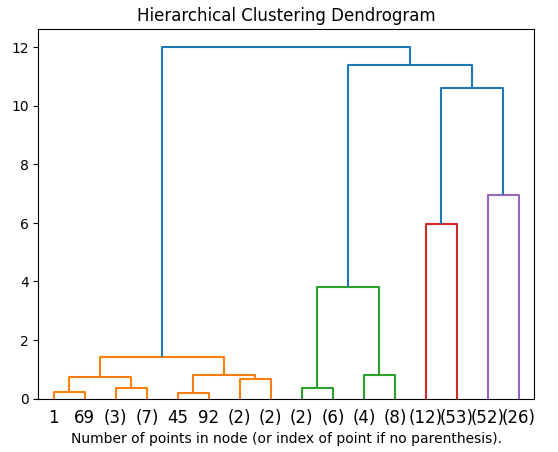](attachment:image-6.png) | [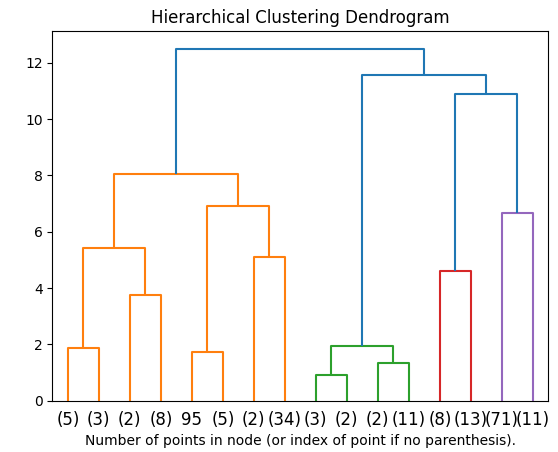](attachment:image-11.png)

#### Top Nodes with cluster assignment
Top 5 nodes by degree centrality
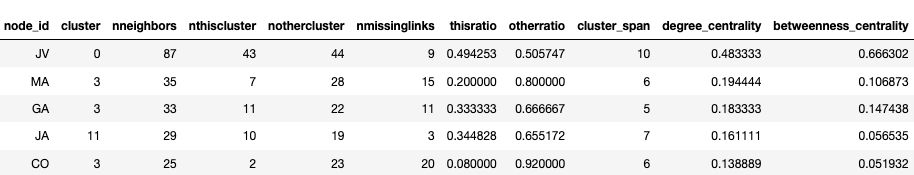
Top 5 nodes by pagerank centrality
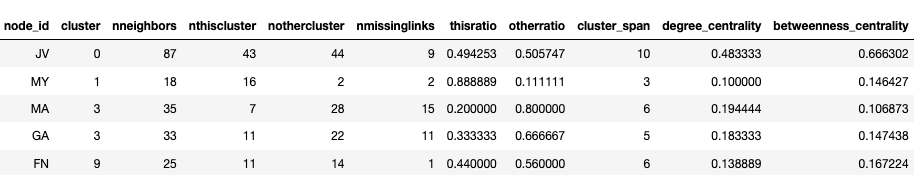
Top 5 nodes by betweeness centrality
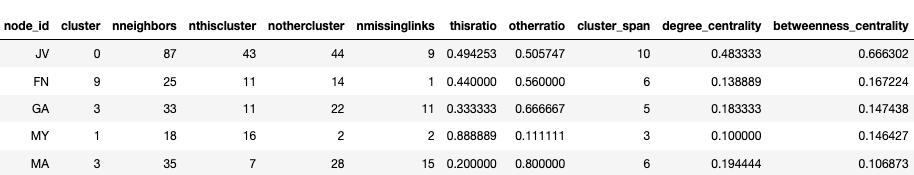

- nthiscluster & thisratio - count & ratio of neighbors part of same cluster
- nothercluster & otherratio - count & ratio of neighors part of other cluster
- nmissinglinks - count of nodes in same cluster which are not in neighbors
- cluster_span - number of unique cluster within the one hop neighborbood


#### Summary
Broadly all the three algorithms clustered the nodes according to the similarity within the the neighborhood as seen in the graph visualization. We can notice that the group of characters which appeared together (crown shape ones in graph) and characters who are connected to the play with only one major character (sputnik shape ones in graph) are clustered togeher.  

The clustering didn't seem to have signification influence on the node2vec p & q parameters. There are varied number of clusters but consistently the neighboring nodes seems to clustered together. The varying number was mostly the nodes on the edge of graph (i.e. with a degree atmost 2). There are three/two of the nodes - CO, GA, MA which seems to be clustered together across, these characters seems bring different part of plays together, acting like a bridge.

We see the highest silhouette score is around 0.5 across all the clustering aglorithms in the grid search tables. Thats the highest score I could get on a grid search (p=[0.5, 1, 2, 4], q=[0.25, 0.5, 1, 2, 4], l = [10, 20], n_clusters=[2, 50]) across three clusters. Other scores - dbindex and chindex didn't seem be highest for the labeling resulted for optimized silhouette score.

# Utilities
List of few python utilities which will be used across this notebook. Utilties include 
- building networkx graph from a file
- Doing gridsearch on node2vec and cluster algos
- plotting

In [157]:
import os
import numpy as np
import pandas as pd

import networkx as nx
from pyvis import network as visnet

from node2vec import Node2Vec

import matplotlib.pyplot as plt

from joblib import Parallel, delayed

from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from clusteval import clusteval

from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score


NAME_NODE_ID = "node_id"
GLOBAL_VERBOSE = 0

# resolve the file_name to the absolute path.
# expects the file be on the same directory of this notebook
# example: 
#     abs_path = to_path("abc.txt")
def to_path(file_name):
    notebook_path = os.path.abspath("Nitesh_Chinthireddy_GraphML.ipynb")
    file_path = os.path.join(os.path.dirname(notebook_path), file_name)
    return file_path

# load data from file to to a panda frame
# expects the file be on the same directory of this notebook
def load_data(file_name, separator=',', head=None):
    file_path = to_path(file_name)
    df = pd.read_csv(file_path, sep=separator, header=head)
    return df

# builds networkx graph from given pandas dataframe (df)
#  edge column names can be passed to src & tgt
def build_graph(df, src='v', tgt='u'):
    G = nx.from_pandas_edgelist(df, source=src, target=tgt)
    G.remove_edges_from(nx.selfloop_edges(G))
    
    degs = nx.degree_centrality(G)
    degs = {k: max(5, v*200) for k, v in degs.items()}
    nx.set_node_attributes(G, degs, 'size')
        
    return G

# uses pyvis to visualize the networkx graph passed 
def visualize_graph(G, height='800px', width='100%'):
    nt = visnet.Network(height, width, notebook=True, cdn_resources='in_line', select_menu=True)
    nt.from_nx(G)
    nt.toggle_physics(True)
    nt.repulsion()
    
    return nt

# builds pandas dataframe based on centrality measure function passed (func)
#   on given networkx graph - G
def feat_centrality(G, func):
    deg = func(G)
    sorted_deg = sorted(deg.items(), key=lambda x:x[1], reverse=True)
    deg_df = pd.DataFrame(sorted_deg, columns=[NAME_NODE_ID, func.__name__])
    return deg_df

# builds pandas dataframe with top 5 nodes on degree/betweeness & pagerank centrality measures
#  on given networkx graph G
def centrality_features(G, funcs=[nx.degree_centrality, nx.betweenness_centrality, nx.pagerank]):
    deg_df = pd.DataFrame(columns=[NAME_NODE_ID])
    top_df = pd.DataFrame(columns=[NAME_NODE_ID])
    for func in funcs:
        df = feat_centrality(G, func)
        top_df = top_df.merge(df.head(5)[[NAME_NODE_ID]], on=NAME_NODE_ID, how="outer")
        deg_df = deg_df.merge(df, on=NAME_NODE_ID, how="outer") 
    
    top_df = top_df.merge(deg_df, on=NAME_NODE_ID, how="inner")
        
    return deg_df, top_df

def nvl(dict, key, dv):
    if key in dict:
        return dv if dict[key] is None else dict[key]
    return dv


# runs node2vec algorithm on given networkx Graph, G.
def run_node2vec(G, params):
    p = nvl(params, 'l', 1)
    q = nvl(params, 'q', 1)
    d = nvl(params, 'd', 128)
    l = nvl(params, 'l', 80)
    r = nvl(params, 'r', 10)
    w = nvl(params, 'w', 5)
    nmin = nvl(params, 'min_count', 1)
    jobs = nvl(params, 'workers', 1)
    
    node2vec_obj = Node2Vec(G, p=p, q=q, dimensions=d, 
                     walk_length=l, num_walks=r, workers=jobs, quiet=True)
    model = node2vec_obj.fit(window=w, min_count=nmin)
    if GLOBAL_VERBOSE > 0:
        print("p", p, "q", q, 
              "feature vector dimensions --> ", 
              pd.DataFrame((model.wv.vectors)).shape)
    return model.wv.index_to_key, (model.wv.vectors), model

# runs PCA on given numpy array A
# returns top PCA components based on coverage in pandas datafram
def run_pca(A, coverage=0.99):
    pca_obj = PCA(coverage)
    df = pd.DataFrame(A)
    pca_components = pca_obj.fit_transform(df)
    if GLOBAL_VERBOSE > 0:
        print(pd.DataFrame({
            "#pca components": [len(pca_components[0])],
            "#A": [df.shape[1]],
            "reduction in percent": [100 - round(len(pca_components[0])/df.shape[1]*100, 0)]
        }))
    return pca_components

def run_node2vec_gridsearch(G, param_grid, jobs=4):  
    def wrap_run_node2vec(G, param):
        (node_ids, features, model) = run_node2vec(G, param)
        X = run_pca(features)
        return param, node_ids, features, model, X
    
    runs = []
    parallel = Parallel(n_jobs=jobs, return_as="generator")
    params = ParameterGrid(param_grid)
    output_generator = parallel(delayed(wrap_run_node2vec)(G, param) for param in params)
    for output in output_generator:
        runs.append({
            "params": output[0], 
            "nodes": output[1], 
            "features": output[2], 
            "model": output[3], 
            "X": output[4]})
    return runs

# class to perfrom grid search for a given clustering algorithm & scorer
# usage:
#    search = ClusterGridSearch(KMeans(), {"n_clusters": [2,3]}, scorer=silhouette_score)
#    search.fit(np.array([[1, 2], [3, 4], [1, 2], [5,6]]))
#    search.best_score_
#    search.best_estimator_
#    search.best_params_: params for the best score
#    search.results_ : dataframe of score and params
class ClusterGridSearch:
    def __init__(self, estimator, param_grid, scorer=silhouette_score, num_runs=1, positive_metric=1):
        self.param_grid = param_grid
        self.base_estimator = estimator
        self.scorer = scorer
        self.positive = positive_metric
        self.tsne_z = None
        self.num_runs = num_runs
    
    def fit(self, X):
        best_estimator = self.base_estimator
        best_score = np.NaN
        best_params = {}
    

        params = ParameterGrid(self.param_grid)
        results = {"score": []}
        for param in params:
            for i in range(1, self.num_runs+1):
                new_params = param.copy()
                new_params["run"] = i
                try:
                    estimator = clone(self.base_estimator)
                    estimator = estimator.set_params(**clone(param, safe=False))
                    estimator = estimator.fit(X)

                    score = self.scorer(X, estimator.labels_)
                    
                    for key in new_params:
                        if not key in results.keys():
                            results[key] = []
                        results[key].append(new_params[key])
                    results["score"].append(score)

                    if best_score is np.NaN:
                        best_score = score
                        best_estimator = estimator
                        best_params = new_params
                    elif self.positive*score > self.positive*best_score:
                        best_score = score
                        best_estimator = estimator
                        best_params = new_params
                except Exception as e:
                    if GLOBAL_VERBOSE > 0:
                        print(e)
        
        self.best_estimator_ = best_estimator
        self.best_score_ = best_score
        self.best_params_ = best_params
        self.results_ = results

        return self
    
    def plot(self, ax):
        ax.plot(self.results_["n_clusters"], self.results_["score"], color='k');
        ax.grid(color='grey', linestyle='--', linewidth=0.2)
        ax.set_title(self.scorer.__name__)
        ax.set_xlabel('#Clusters', color='b')
        ax.axvline(x=self.best_params_["n_clusters"], ymin=0, linewidth=2, color='r', linestyle="--")
        return self
        
    def scatter(self, X, ax):
        ax.scatter(X[:,0], X[:,1],c=self.best_estimator_.labels_);
        ax.grid(True)
        return self
    
    def tsne_plot(self, X, ax):
        tsne = TSNE(n_components=2, verbose=0, random_state=123)
        if self.tsne_z is None:
            self.tsne_z = tsne.fit_transform(pd.DataFrame(X))
        ax.scatter(self.tsne_z[:,0], self.tsne_z[:,1],c=self.best_estimator_.labels_);
        ax.grid(True)
        
    def dendrogram(self, X):
        if not isinstance(self.best_estimator_, AgglomerativeClustering):
            return
        
        model = self.best_estimator_
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)
        return linkage_matrix

# runs KMeans on n_clusters 2 to 50 & using silhouette_score
# and returns best model/estimator
def run_kmeans(X, cluster_range=range(2, 100)):
    params_grid = {
        "n_clusters": cluster_range,
        "n_init": ['auto']
    }

    search = ClusterGridSearch(KMeans(), params_grid, scorer=silhouette_score)
    search.fit(X)
    if GLOBAL_VERBOSE > 0:
        print(pd.DataFrame({
            "best score": [search.best_score_],
            "n_clusters": [search.best_params_["n_clusters"]]
        }))
    return search
      

# runs node2vec, pca and KMeans using silhouette_score
#    on n_clusters 2 to 50, pca coverage of 0.99
# returns 
#   best KMeans model
#   node to cluster labels dataframe and 
#   pca feature dataframe
def run_kmeans_pipeline(G, node2vec_params, cluster_range=range(2, 100), jobs=4):
    nodes, features, _ = run_node2vec(G, node2vec_params, jobs=jobs)
    X = run_pca(features)
    model = run_kmeans(X, cluster_range)
    
    node_labels = pd.concat([
        pd.DataFrame(nodes, columns=["node_id"]), 
        pd.DataFrame(model.best_estimator_.labels_, columns=["cluster"])],
        axis=1
    )
    
    return model, node_labels, X

# runs a grid search on dbscan over eps
def run_dbscan(X):
    search = clusteval(cluster='dbscan', verbose=60)
    search.fit(X)
    return search

# runs node2vec, pca and DBscan using silhouette_score
#    on n_clusters 2 to 50, pca coverage of 0.99
# returns 
#   best model
#   node to cluster labels dataframe and 
#   pca feature dataframe
def run_dbscan_pipeline(G, node2vec_params):
    nodes, features, _ = run_node2vec(G, node2vec_params)
    X = run_pca(features)
    model = run_dbscan(X)
    
    node_labels = pd.concat([
        pd.DataFrame(nodes, columns=["node_id"]), 
        pd.DataFrame(model.results['labx'], columns=["cluster"])],
        axis=1
    )
    
    return model, node_labels, X

# runs AgglomerativeClustering on n_clusters 2 to 50 & using silhouette_score
# and returns best model/estimator
def run_hierarchial(X):
    
    params_grid = {
        "n_clusters": range(2, 50),
        "metric": ["euclidean"],
        "linkage": ["ward"],
        "compute_distances": [True]
    }

    search = ClusterGridSearch(AgglomerativeClustering(), params_grid, scorer=silhouette_score)
    search.fit(X)
    if GLOBAL_VERBOSE > 0:
        print(pd.DataFrame({
            "best score": [search.best_score_],
            "n_clusters": [search.best_params_["n_clusters"]]
        }))
    return search

# runs node2vec, pca and AgglomerativeClustering using silhouette_score
#    on n_clusters 2 to 50, pca coverage of 0.99
# returns 
#   best KMeans model
#   node to cluster labels dataframe and 
#   pca feature dataframe
def run_hierachial_pipeline(G, node2vec_params):
    nodes, features, _ = run_node2vec(G, node2vec_params)
    X = run_pca(features)
    model = run_hierarchial(X)
    
    node_labels = pd.concat([
        pd.DataFrame(nodes, columns=["node_id"]), 
        pd.DataFrame(model.best_estimator_.labels_, columns=["cluster"])],
        axis=1
    )
    
    return model, node_labels, X

def apply_other_scores(runs, results):
    db_score = []
    chi_score = []
    sl_score = []
    for index, run in enumerate(runs):
        labels = run['node_labels']['cluster']
        db_score.append(dbindex(run['X'], labels))
        chi_score.append(chindex(run['X'], labels))
        sl_score.append(silhouette_score(run['X'], labels))
    
    results['db_score'] = db_score
    results['chi_score'] =chi_score
    results['sl_score'] = sl_score
    
    results.sort_values(by='best_score', ascending=False, inplace=True)
    return runs, results


    

# runs grid search on node2vec and kmeans
#  usage:
#     param_grid = {'p': [0.25, 0.5, 1, 2, 4], 'q': [0.25, 0.5, 1, 2, 4], 'l': [8]}
#     (runs, results_df) = run_kmeans_gridseach(networkx_graph, param_grid)
#  runs[i].params, runs[i].search, runs[i].node_lables, and runs[i].X
#     for each run the function returns params, best KMeans model, node to cluster lables and pca features
#  results_df[i] is summary of each run
def run_kmeans_gridseach(G, param_grid, jobs=1):  
    def wrap_run_kmeans_pipeline(G, param):
        (search, node_labels, X) = run_kmeans_pipeline(
            G, param)
        return param, search, node_labels, X
    
    runs = []
    parallel = Parallel(n_jobs=jobs, return_as="generator")
    params = ParameterGrid(param_grid)
    output_generator = parallel(delayed(wrap_run_kmeans_pipeline)(G, param) for param in params)
    for output in output_generator:
        runs.append({"params": output[0], "search": output[1], "node_labels": output[2], "X": output[3]})

    results = []
    for run in runs:
        results.append({
            "params": str(run["params"]),
            "best_score": run["search"].best_score_,
            "n_clusters": run["search"].best_params_["n_clusters"]
        })
    results_df = pd.DataFrame(results)
    (runs, results_df) = apply_other_scores(runs, results_df)
    
    return runs, results_df
    

# runs grid search on node2vec and AgglomerativeClustering
#  usage:
#     param_grid = {'p': [0.25, 0.5, 1, 2, 4], 'q': [0.25, 0.5, 1, 2, 4], 'l': [8]}
#     (runs, results_df) = run_kmeans_gridseach(networkx_graph, param_grid)
#  runs[i].params, runs[i].search, runs[i].node_lables, and runs[i].X
#     for each run the function returns params, best AgglomerativeClustering model, node to cluster lables and pca features
#  results_df[i] is summary of each run
def run_hierachial_gridseach(G, param_grid, jobs=1):  
    def wrap_run_hierachial_pipeline(G, param):
        (search, node_labels, X) = run_hierachial_pipeline(G, param)
        return param, search, node_labels, X
    
    runs = []
    parallel = Parallel(n_jobs=jobs, return_as="generator")
    params = ParameterGrid(param_grid)
    output_generator = parallel(delayed(wrap_run_hierachial_pipeline)(G, param) for param in params)
    for output in output_generator:
        runs.append({"params": output[0], "search": output[1], "node_labels": output[2], "X": output[3]})

    results = []
    for run in runs:
        results.append({
            "params": str(run["params"]),
            "best_score": run["search"].best_score_,
            "n_clusters": run["search"].best_params_["n_clusters"]
        })
    results_df = pd.DataFrame(results)
    (runs, results_df) = apply_other_scores(runs, results_df)
    
    return runs, results_df

# runs grid search on node2vec and dbscan
#  usage:
#     param_grid = {'p': [0.25, 0.5, 1, 2, 4], 'q': [0.25, 0.5, 1, 2, 4], 'l': [8]}
#     (runs, results_df) = run_dbscan_gridseach(networkx_graph, param_grid)
#  runs[i].params, runs[i].search, runs[i].node_lables, and runs[i].X
#     for each run the function returns params, best model, node to cluster labels and pca features
#  results_df[i] is summary of each run
def run_dbscan_gridseach(G, param_grid, jobs=1):  
    def wrap_run_dbscan_pipeline(G, param):
        try:
            (search, node_labels, X) = run_dbscan_pipeline(G, param)
            return param, search, node_labels, X, False
        except Exception as e:
            return param, None, None, None, True
    
        
    
    runs = []
    parallel = Parallel(n_jobs=jobs, return_as="generator")
    params = ParameterGrid(param_grid)
    output_generator = parallel(delayed(wrap_run_dbscan_pipeline)(G, param) for param in params)
    for output in output_generator:
        runs.append({
            "params": output[0], "search": output[1], 
            "node_labels": output[2], "X": output[3], 
            'is_exception': output[4]
        })

    clean_runs = []
    error_runs = []
    for run in runs:
        if not run['is_exception']:
            clean_runs.append(run)
        else:
            error_runs.append(run)
            
    results = []
    for run in clean_runs:
        results.append({
            "params": str(run["params"]),
            "best_score": np.max(run["search"].results['fig']['silscores']),
            "n_clusters": run["search"].results["n_clusters"]
        })
            
    results_df = pd.DataFrame(results)
    (clean_runs, results_df) = apply_other_scores(clean_runs, results_df)
    
    return clean_runs, results_df, error_runs


# plot each run's cluster vs score, tsne scatter plot
# each run is for a grid search on node2vec
def plot_runs(best_runs, title):
    fig = plt.figure(constrained_layout=True, figsize=(25, 16*len(best_runs)))
    fig.suptitle(title)

    subfigs = fig.subfigures(nrows=len(best_runs), ncols=1)

    for i, run in enumerate(best_runs):
        subfig = subfigs
        if len(best_runs) > 1:
            subfig = subfigs[i]

        subfig.suptitle(f"for Node2Vec("+str(run["params"])+")")
        axs = subfig.subplots(nrows=1, ncols=2)
        run["search"].plot(axs[0])
        #axs[0].set_title(str(axs[0].title)+" "+str(run["params"]))
        run["search"].tsne_plot(run["X"], axs[1])

    plt.show()    

#testing  
test_search = ClusterGridSearch(KMeans(n_init='auto'), {"n_clusters": [2,3]})
test_search.fit(np.array([[1, 2], [3, 4], [1, 2], [5,6]]))
print(test_search.best_score_)
print(test_search.best_params_)

d = {'a': 1, 'b': None}
print("1", "==", nvl(d, 'a', 2))
print("2", "==", nvl(d, 'b', 2))
print("2", "==", nvl(d, 'c', 2))

0.625
{'n_clusters': 2, 'run': 1}
1 == 1
2 == 2
2 == 2


# Facebook - Graph

In [11]:
import networkx as nx
import warnings 

#load data
fb_df = load_data("facebook_combined.txt", separator=' ')
fb_df.columns = ['v', 'u']

# build graph
fb_graph = build_graph(fb_df)
print(fb_graph)

fb_egos = [0, 107, 1684, 1912, 3437, 348, 3980, 414, 686, 698]

# check few important nodes with high degree centrality
fb_nodes_df = feat_centrality(fb_graph, nx.degree_centrality)
topdeg_fb_nodes_df = fb_nodes_df.head(10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    topdeg_fb_nodes_df['is_ego'] = topdeg_fb_nodes_df['node_id'].map(lambda x: x in fb_egos)

topdeg_fb_nodes_df

Graph with 4039 nodes and 88234 edges


node_id  degree_centrality  is_ego
0      107           0.258791    True
1     1684           0.196137    True
2     1912           0.186974    True
3     3437           0.135463    True
4        0           0.085934    True
5     2543           0.072808   False
6     2347           0.072065   False
7     1888           0.062902   False
8     1800           0.060674   False
9     1663           0.058197   False

In [48]:
# check few important nodes with high page rank
fb_nodes_df = feat_centrality(fb_graph, nx.pagerank)
toprnk_fb_nodes_df = fb_nodes_df.head(10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    toprnk_fb_nodes_df['is_ego'] = toprnk_fb_nodes_df['node_id'].map(lambda x: x in fb_egos)

toprnk_fb_nodes_df

node_id  pagerank  is_ego
0     3437  0.007615    True
1      107  0.006936    True
2     1684  0.006367    True
3        0  0.006290    True
4     1912  0.003877    True
5      348  0.002348    True
6      686  0.002219    True
7     3980  0.002170    True
8      414  0.001800    True
9      698  0.001317    True

In [95]:
#TODO: need to check the important nodes within a subgraph/egonet
#  this will let compute other centrality measures - betweeness, closeness, eigen, etc..

Visual graph for the dataset
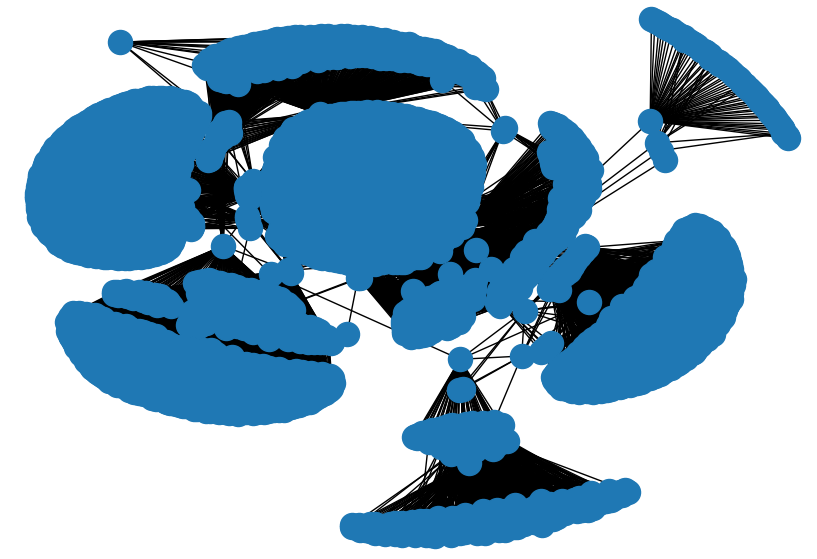

# Facebook - node2vec

In [60]:
# common p & q values - [0.25, 1, 4]
# build node2vec model and generate features
# run_node2vec(G, p=1, q=1, d=128, l=80, r=10, jobs=1)
# l - walk_length, r - num_walks, d - dimensions
# p - return parameter: controls the likelihood of immediately revisiting a node in the walk. 
#   > max(q, 1) ensures that we are less likely to sample an already visited node
#   < min(q, 1)), it would lead the walk to backtrack a step and keep the walk “local”
# q - In out parameter: allows the search to differentiate between “inward” and “outward” nodes
#   > 1 is biased towards nodes within a small locality (BFS) 
#   < 1 walk is more inclined to visit nodes which are further away (DFS)
(fb_node_ids1, fb_feature_vectors1, fb_node2vec_model1) = run_node2vec(
    fb_graph, {'d':64, 'l':10, 'p':1, 'q':4, 'workers': 4})

(fb_node_ids2, fb_feature_vectors2, fb_node2vec_model2) = run_node2vec(
    fb_graph, {'d':64, 'l':10, 'p':4, 'q':1, 'workers': 4})

Checking to see if the most_similar nodes given by Node2Vec are its immediate neighbors

In [61]:
import numpy as np
import random as rnd

def get_neighbors(G, id):
   return np.array([nb for nb in G.neighbors(id)])

def get_most_similar(model, id):
    return np.array([id for (id, _) in model.wv.most_similar(id)])

def diff_count(a, b):
    return a[ [n not in b for n in a]].shape[0]

# check if for a given node, most_similar are not in immediate neighbors
for some_node in rnd.sample(fb_node_ids1, 5):
    nbs = get_neighbors(fb_graph, int(some_node))
    
    similar_nodes = get_most_similar(fb_node2vec_model1, some_node)
    n_not_nbs = diff_count(similar_nodes, nbs)
    print("p=1,q=4:", n_not_nbs, "from top 10 most similar nodes of", some_node, "are not its immediate neighbors.")
    
    similar_nodes = get_most_similar(fb_node2vec_model2, some_node)
    n_not_nbs = diff_count(similar_nodes, nbs)
    print("p=4,q=1:", n_not_nbs, "from top 10 most similar nodes of", some_node, "are not its immediate neighbors.")
    

p=1,q=4: 10 from top 10 most similar nodes of 1891 are not its immediate neighbors.
p=4,q=1: 10 from top 10 most similar nodes of 1891 are not its immediate neighbors.
p=1,q=4: 10 from top 10 most similar nodes of 3833 are not its immediate neighbors.
p=4,q=1: 10 from top 10 most similar nodes of 3833 are not its immediate neighbors.
p=1,q=4: 10 from top 10 most similar nodes of 1058 are not its immediate neighbors.
p=4,q=1: 10 from top 10 most similar nodes of 1058 are not its immediate neighbors.
p=1,q=4: 10 from top 10 most similar nodes of 648 are not its immediate neighbors.
p=4,q=1: 10 from top 10 most similar nodes of 648 are not its immediate neighbors.
p=1,q=4: 10 from top 10 most similar nodes of 183 are not its immediate neighbors.
p=4,q=1: 10 from top 10 most similar nodes of 183 are not its immediate neighbors.


Run Node2Vec on different parameters to be later used in clustering.
Using default values 
- dimension=128
- window=5 (context size or k)
- p=0.5, q=4 (to explore structural equivalency between nodes)
- min_count=1 (consider sentence of min 1 word)

In [62]:
param_grid = {
    'p': [0.5],
    'q': [4],
    'd': [128],
    'l': [8, 16, 32],
    'r': [4, 8, 16, 32]
}
node2vec_runs = run_node2vec_gridsearch(fb_graph, param_grid, jobs=4)

Leverage K-Means grid-search with silhouetter cofficient scorer to explore node2vec parameters. 

 - why k-means ? - the clusters seems to be close to gobular structure in Les-Miserables dataset, so K-Means. (Will check on this dataset too)
- why silhouetter cofficient? - a measure of density of intra-cluster over sparsity of inter-cluser.

In [160]:
params_grid = {
     "n_clusters": range(2, 50),
     "n_init": ['auto']
}

kmeans_results = []
kmeans_runs = []
for node2vec_run in node2vec_runs:
     X = node2vec_run["X"]
     search = ClusterGridSearch(KMeans(n_init='auto'), params_grid, scorer=silhouette_score, num_runs=10)
     search.fit(X)
     kmeans_runs.append({
          "search": search,
          "clusters": search.best_params_["n_clusters"],
          "best_score": search.best_score_,
          'params': node2vec_run['params'],
          'X': X
     })
kmeans_runs_df = pd.DataFrame(kmeans_runs).sort_values(by='best_score', ascending=False)

In [161]:
kmeans_results_df = kmeans_runs_df.drop(["search"], axis=1)
kmeans_results_df["str_params"] = kmeans_runs_df["params"].map(lambda x: str(x))
kmeans_results_df = kmeans_results_df.drop(["params", "X"], axis=1)
kmeans_results_df

clusters  best_score                                      str_params
1         28    0.481023    {'d': 128, 'l': 8, 'p': 0.5, 'q': 4, 'r': 8}
4         34    0.480208   {'d': 128, 'l': 16, 'p': 0.5, 'q': 4, 'r': 4}
0         19    0.465643    {'d': 128, 'l': 8, 'p': 0.5, 'q': 4, 'r': 4}
2         40    0.423388   {'d': 128, 'l': 8, 'p': 0.5, 'q': 4, 'r': 16}
5         24    0.405391   {'d': 128, 'l': 16, 'p': 0.5, 'q': 4, 'r': 8}
8         22    0.403895   {'d': 128, 'l': 32, 'p': 0.5, 'q': 4, 'r': 4}
6         21    0.363318  {'d': 128, 'l': 16, 'p': 0.5, 'q': 4, 'r': 16}
9         22    0.354506   {'d': 128, 'l': 32, 'p': 0.5, 'q': 4, 'r': 8}
3         48    0.342484   {'d': 128, 'l': 8, 'p': 0.5, 'q': 4, 'r': 32}
10         7    0.286831  {'d': 128, 'l': 32, 'p': 0.5, 'q': 4, 'r': 16}
7          7    0.284934  {'d': 128, 'l': 16, 'p': 0.5, 'q': 4, 'r': 32}
11         7    0.247345  {'d': 128, 'l': 32, 'p': 0.5, 'q': 4, 'r': 32}

Node2Vec walk_length(l) and num_walks(r) vs Silhouette cofficent

walk_length (l) is the number of steps in the random walk of node2vec algo. Increasing length should have higher sampling and hence improved performance.

context size/window size parmeter of gensim skip-gram model is related to the length is which is kept constant 5.

num_walks (r) is number of random walks of length l per node. Increasing length should have higher sampling and hence improved performance.

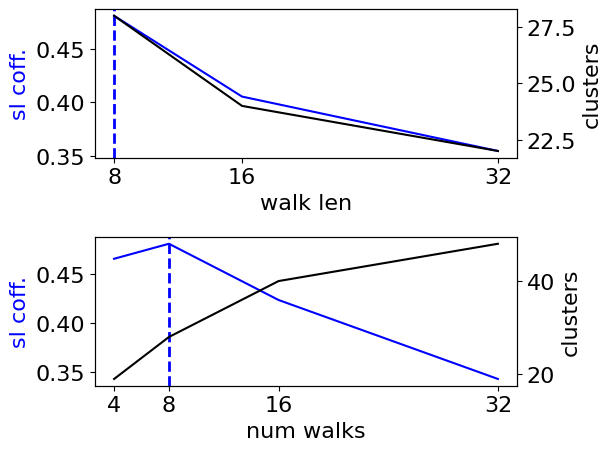

In [162]:
import matplotlib.pyplot as plt

l_opt = kmeans_runs_df.iloc[0]["params"]['l']
r_opt = kmeans_runs_df.iloc[0]["params"]['r']
max_score = kmeans_runs_df.iloc[0]["best_score"]

l_score = []
walk_length = []
l_clusters = []

r_score = []
num_walks = []
r_clusters = []
for run in kmeans_runs:
    r = run["params"]["r"]
    if r == r_opt:
        l_score.append(run["search"].best_score_)
        walk_length.append(run["params"]["l"])
        l_clusters.append(run["search"].best_params_["n_clusters"])
            
for run in kmeans_runs:      
    l = run["params"]["l"]
    if l == l_opt:
        r_score.append(run["search"].best_score_)
        num_walks.append(run["params"]["r"])
        r_clusters.append(run["search"].best_params_["n_clusters"])

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(walk_length, l_score, color='blue')
ax1.set_xlabel('walk len')
ax1.set_ylabel('sl coff.', color='blue')
ax1.axvline(x=l_opt, ymin=0, linewidth=2, color='blue', linestyle="--", label=l_max_score)
ax1.set_xticks([8, 16, 32], walk_length)

ax11 = ax1.twinx()
ax11.set_ylabel('clusters', color='black') 
ax11.plot(walk_length, l_clusters, color='black')

ax2.plot(num_walks, r_score, color='blue')
ax2.set_xlabel('num walks')
ax2.set_ylabel('sl coff.', color='blue')
ax2.axvline(x=r_opt, ymin=0, linewidth=2, color='blue', linestyle="--", label=r_max_score)
ax2.set_xticks([4, 8, 16, 32], num_walks)

ax21 = ax2.twinx()
ax21.set_ylabel('clusters', color='black') 
ax21.plot(num_walks, r_clusters, color="black")

fig.tight_layout()
plt.show()

We see the sl. cofficient is maxed at l=16 and r=4, which is contrary to the node2vec paper.

Going forward for clustering we will use p=0.5, q=4, l=16, and r=4

In [164]:
X = kmeans_runs_df.iloc[0]["X"]

# Facebook - Apply clustering

## KMeans grid-search

<Figure size 640x480 with 0 Axes>

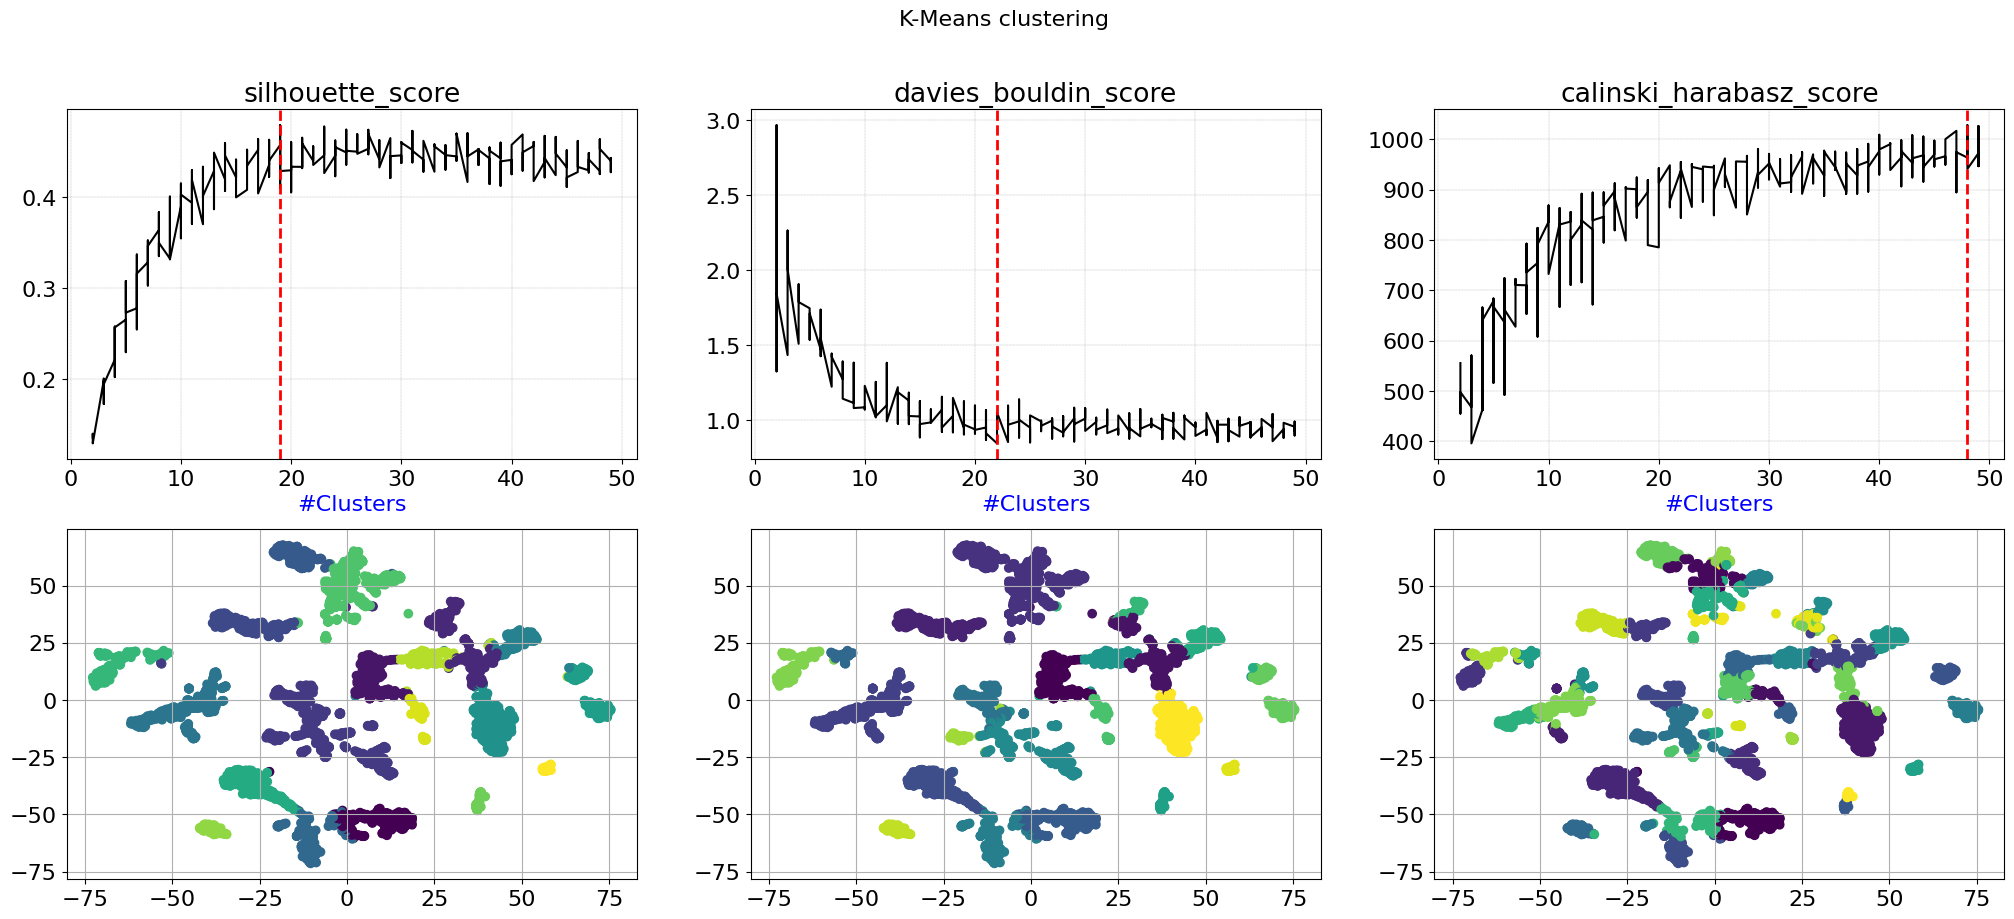

In [165]:
from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


plt.figure()
fig, axs = plt.subplots(2,3, figsize=(25,10))
fig.suptitle("K-Means clustering", fontsize=16)

params_grid = {
    "n_clusters": range(2, 50),
    "max_iter": [1000]
}

sl_kmsearch = ClusterGridSearch(KMeans(n_init='auto'), params_grid, scorer=silhouette_score, num_runs=10)
sl_kmsearch.fit(X)
sl_kmsearch.plot(axs[0][0])
sl_kmsearch.tsne_plot(X, axs[1][0])

db_kmsearch = ClusterGridSearch(KMeans(n_init='auto'), params_grid, scorer=dbindex, num_runs=10, positive_metric=-1)
db_kmsearch.fit(X)
db_kmsearch.plot(axs[0][1])
db_kmsearch.tsne_plot(X, axs[1][1])

ch_kmsearch = ClusterGridSearch(KMeans(n_init='auto'), params_grid, scorer=chindex, num_runs=10)
ch_kmsearch.fit(X)
ch_kmsearch.plot(axs[0][2])
ch_kmsearch.tsne_plot(X, axs[1][2])

plt.show()

In [166]:
from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score

for srch in [sl_kmsearch, db_kmsearch, ch_kmsearch]:
     srch.sl_score_  = silhouette_score(X, srch.best_estimator_.labels_)
     srch.ch_score_  = chindex(X, srch.best_estimator_.labels_)
     srch.db_score_  = dbindex(X, srch.best_estimator_.labels_)

def extract_params(srch):
    return (
        str(srch.scorer.__name__),
        srch.best_score_,
        srch.best_params_['n_clusters'],
        srch.sl_score_,
        srch.ch_score_,
        srch.db_score_
    )

km_scoring_df = pd.DataFrame(
    [ extract_params(srch) for srch in [sl_kmsearch, db_kmsearch, ch_kmsearch] ],
    columns=['scorer', 'score', 'clusters', 'sl_score', 'ch_score', 'db_score'])
km_scoring_df

scorer        score  clusters  sl_score     ch_score  \
0         silhouette_score     0.479055        19  0.479055   913.320033   
1     davies_bouldin_score     0.843061        22  0.478695   901.315130   
2  calinski_harabasz_score  1028.212291        48  0.446345  1028.212291   

   db_score  
0  0.836773  
1  0.843061  
2  0.853555

### K-Means Summary:
T-SNE plots are comparable between the clusters formed through scorers silhouette (first) & davies_bouldin (second). First T-SNE plot seems to have better clustering from naked eye but the silhouette coffiecient is slightly higher for the second one.

calinski_harabasz index seems to get better as we run for higher clusters and it found the optimal at the highest number of clusters (max 49) which could potentialy continue. The corresponding T-SNE plot seems to give overlapping clusters (though with the a slight drop in the silhouetter score)

## AgglomerativeClustering grid-search

<Figure size 640x480 with 0 Axes>

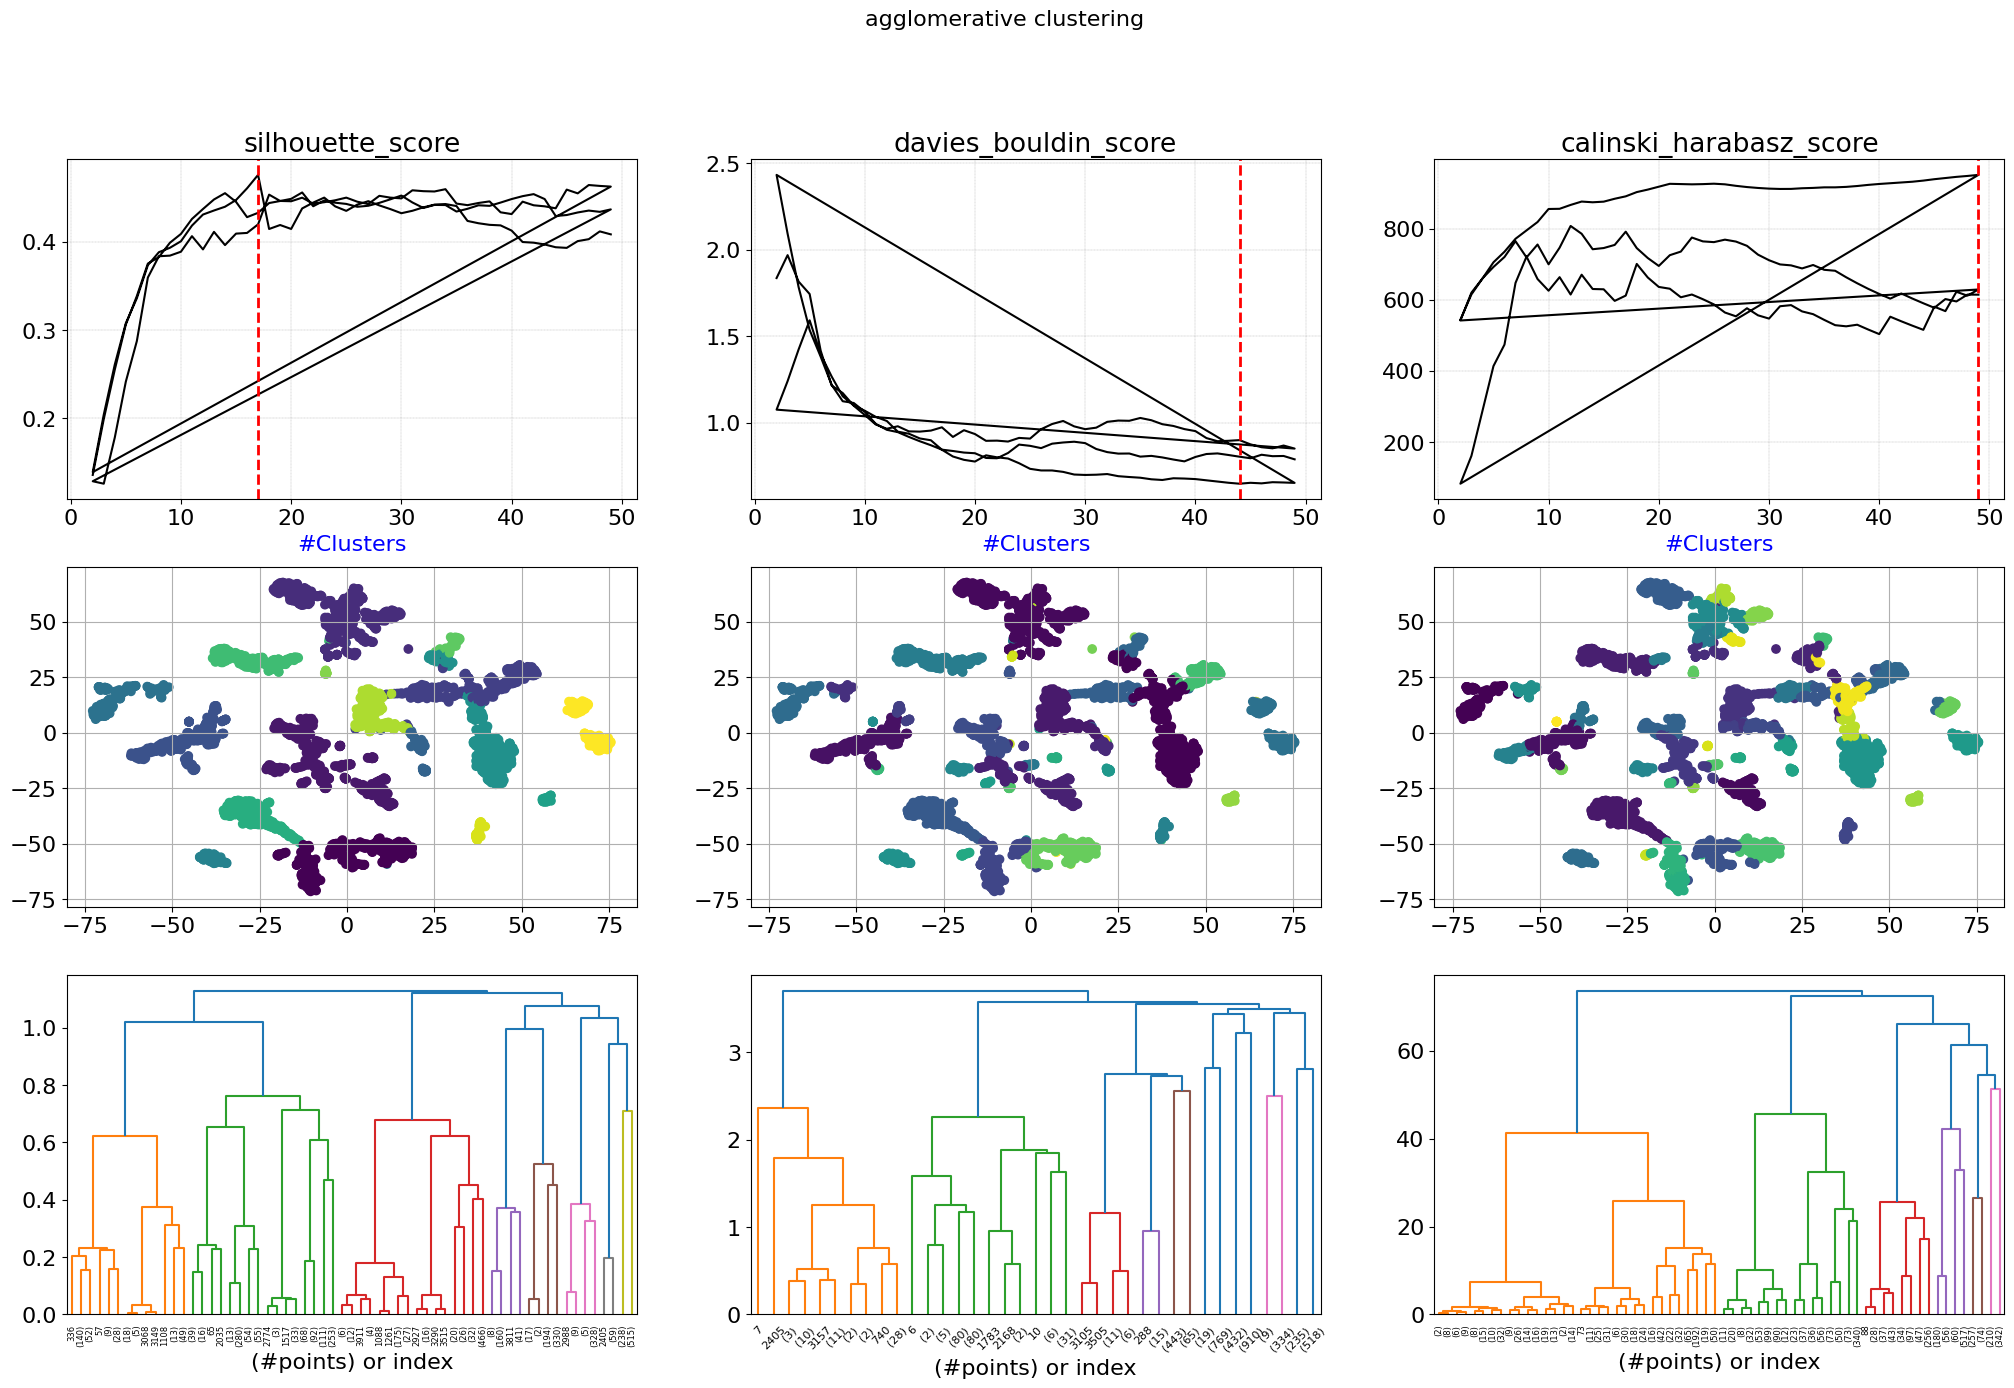

In [168]:
from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

plt.figure()
fig, axs = plt.subplots(3,3, figsize=(25,15))
fig.suptitle("agglomerative clustering", fontsize=16)

# As we are searching for the similarity between the nodes, 
#   we can try using cosine similarity which is the measure of similarity 
#   between two vectors - features extracted based on random walks on each node.
params_grid = {
    "n_clusters": range(2, 50),
    "metric": ["euclidean", "cosine"],
    "linkage": ["ward", "average"],
    "compute_distances": [True]
}

sl_amsearch = ClusterGridSearch(AgglomerativeClustering(), params_grid, scorer=silhouette_score, num_runs=10)
sl_amsearch.fit(X)
sl_amsearch.plot(axs[0][0])
sl_amsearch.tsne_plot(X, axs[1][0])
dendrogram(sl_amsearch.dendrogram(X), truncate_mode="level", p=5, ax=axs[2][0])
axs[2][0].set_xlabel("(#points) or index")

db_amsearch = ClusterGridSearch(AgglomerativeClustering(), params_grid, scorer=dbindex, positive_metric=-1, num_runs=10)
db_amsearch.fit(X)
db_amsearch.plot(axs[0][1])
db_amsearch.tsne_plot(X, axs[1][1])
dendrogram(db_amsearch.dendrogram(X), truncate_mode="level", p=5, ax=axs[2][1])
axs[2][1].set_xlabel("(#points) or index")

ch_amsearch = ClusterGridSearch(AgglomerativeClustering(), params_grid, scorer=chindex, num_runs=10)
ch_amsearch.fit(X)
ch_amsearch.plot(axs[0][2])
ch_amsearch.tsne_plot(X, axs[1][2])
dendrogram(ch_amsearch.dendrogram(X), truncate_mode="level", p=5, ax=axs[2][2])
axs[2][2].set_xlabel("(#points) or index")

plt.show()

In [169]:
from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score

for srch in [sl_amsearch, db_amsearch, ch_amsearch]:
     srch.sl_score_  = silhouette_score(X, srch.best_estimator_.labels_)
     srch.ch_score_  = chindex(X, srch.best_estimator_.labels_)
     srch.db_score_  = dbindex(X, srch.best_estimator_.labels_)


def extract_params(srch):
    return (
        str(srch.scorer.__name__),
        srch.best_score_,
        srch.best_params_['n_clusters'],
        srch.best_params_['metric'],
        srch.best_params_['linkage'],
        srch.sl_score_,
        srch.db_score_,
        srch.ch_score_
    )
    
am_scoring_df = pd.DataFrame(
    [ extract_params(srch) for srch in [sl_amsearch, db_amsearch, ch_amsearch] ],
    columns=['scorer', 'score', 'clusters', 
             "metric", "linkage", 'sl_score', 'db_score', 'ch_score'])
am_scoring_df

scorer       score  clusters     metric  linkage  \
0         silhouette_score    0.475906        17     cosine  average   
1     davies_bouldin_score    0.647062        44  euclidean  average   
2  calinski_harabasz_score  951.222245        49  euclidean     ward   

   sl_score  db_score    ch_score  
0  0.475906  0.843931  791.519516  
1  0.438008  0.647062  515.492638  
2  0.436759  0.850134  951.222245

In [149]:
params_grid = {
    "n_clusters": range(2, 50),
    "metric": ["euclidean"],
    "linkage": ["ward", "average"],
    "compute_distances": [True]
}

sl_eclidean_amsearch = ClusterGridSearch(AgglomerativeClustering(), params_grid, scorer=silhouette_score, num_runs=10)
sl_eclidean_amsearch.fit(X)
print(sl_eclidean_amsearch.best_score_, sl_eclidean_amsearch.best_params_["n_clusters"])

0.45792305 35


### AgglomerativeClustering Summary

AgglomerativeClustering grid-search over silhouette scorer yeild a best silhouette score of 0.47 @ 25 clusters using cosine similarity distance measure. (that of ecludian distance measure, 0.46 silhouette score with 35 clusters).

Using other scorers - davies_bouldin & calinski_harabasz, they yeild higher number of clusters with 46 and 49 with slight lower silhouette score (0.43). 

## DBSCAN grid-search

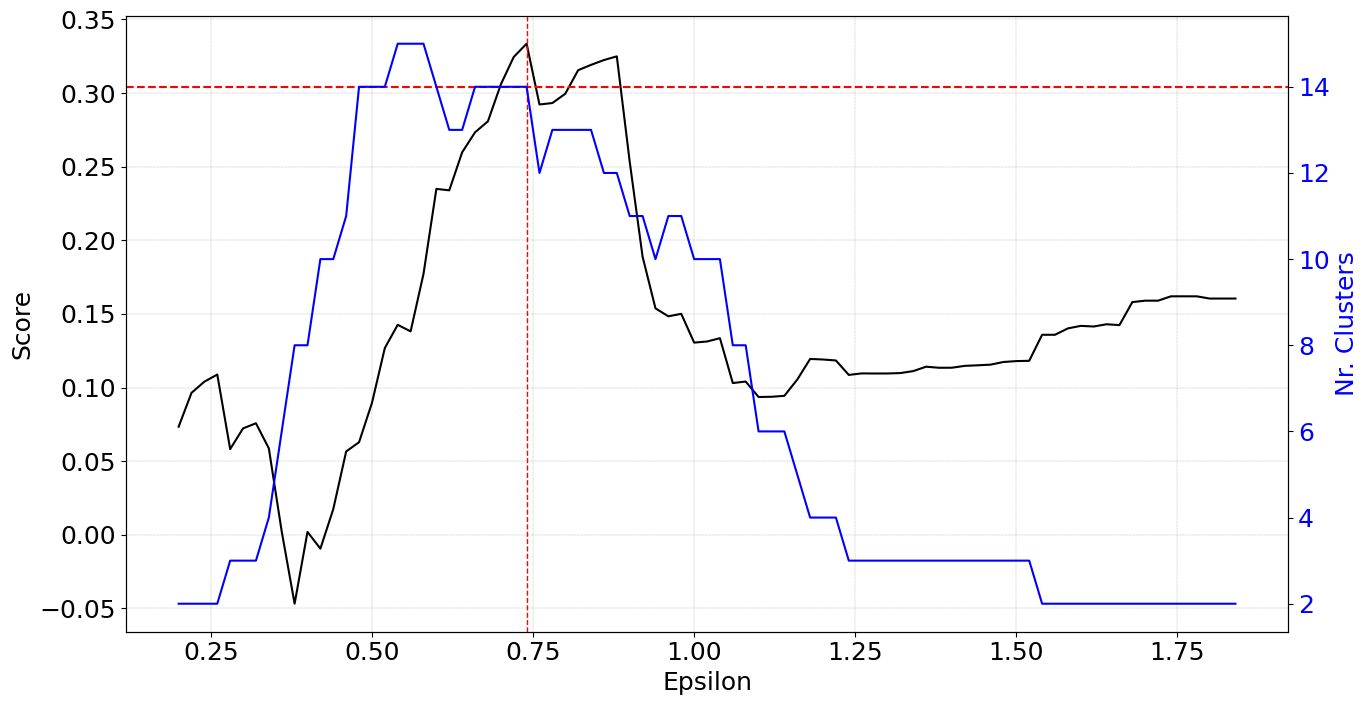

(<Figure size 1500x800 with 2 Axes>,
 (<Axes: xlabel='Epsilon', ylabel='Score'>, <Axes: ylabel='Nr. Clusters'>))

In [118]:
from clusteval import clusteval

X = kmeans_runs_df.iloc[0]["X"]

#does grid search over eps
dbsearch = clusteval(cluster='dbscan', max_clust=50, verbose=60)
results = dbsearch.fit(X)

dbsearch.plot()

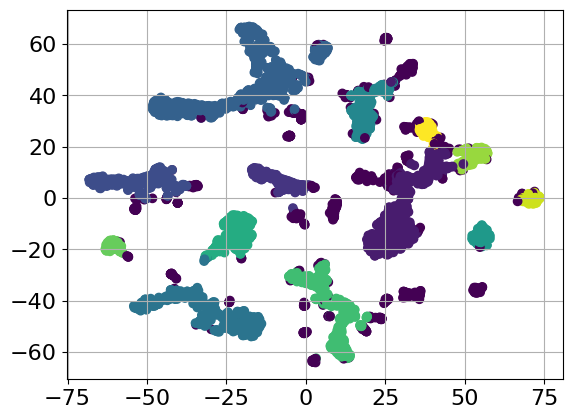

In [126]:
import pandas as pd
from sklearn.manifold import TSNE

def db_tsne_plot(X, labels, ax):
   dbsearch_tsne = TSNE(n_components=2, verbose=0, random_state=123)
   dbsearch_tsne_z = dbsearch_tsne.fit_transform(pd.DataFrame(X))
   ax.scatter(dbsearch_tsne_z[:,0], dbsearch_tsne_z[:,1],c=labels); 
   ax.grid(True)
   
#T-SNE plot
db_tsne_plot(X, results['labx'], plt)
plt.show()

In [132]:
import pandas as pd

from sklearn.metrics import calinski_harabasz_score as chindex
from sklearn.metrics import davies_bouldin_score as dbindex
from sklearn.metrics import silhouette_score

sl_score_  = silhouette_score(X, results['labx'])
ch_score_  = chindex(X, results['labx'])
db_score_  = dbindex(X, results['labx'])

dbs_scoring_df = pd.DataFrame([{
    'sl_score': sl_score_, 
    'ch_score': ch_score_, 
    'db_score': db_score_,
    'clusters': results["n_clusters"]
    }])
dbs_scoring_df

sl_score    ch_score  db_score  clusters
0  0.333527  426.268663  1.538967        13

### DBSCAN Summary

DBSCAN  grid-search over eps (0.25 to 1.75) provided 13 clusters at max silhouette score of 0.3. 

TNSNE plot seems to group seperated blobs under same cluster, which could have resulted in low silhouette score. 

# Conclusion

<Figure size 640x480 with 0 Axes>

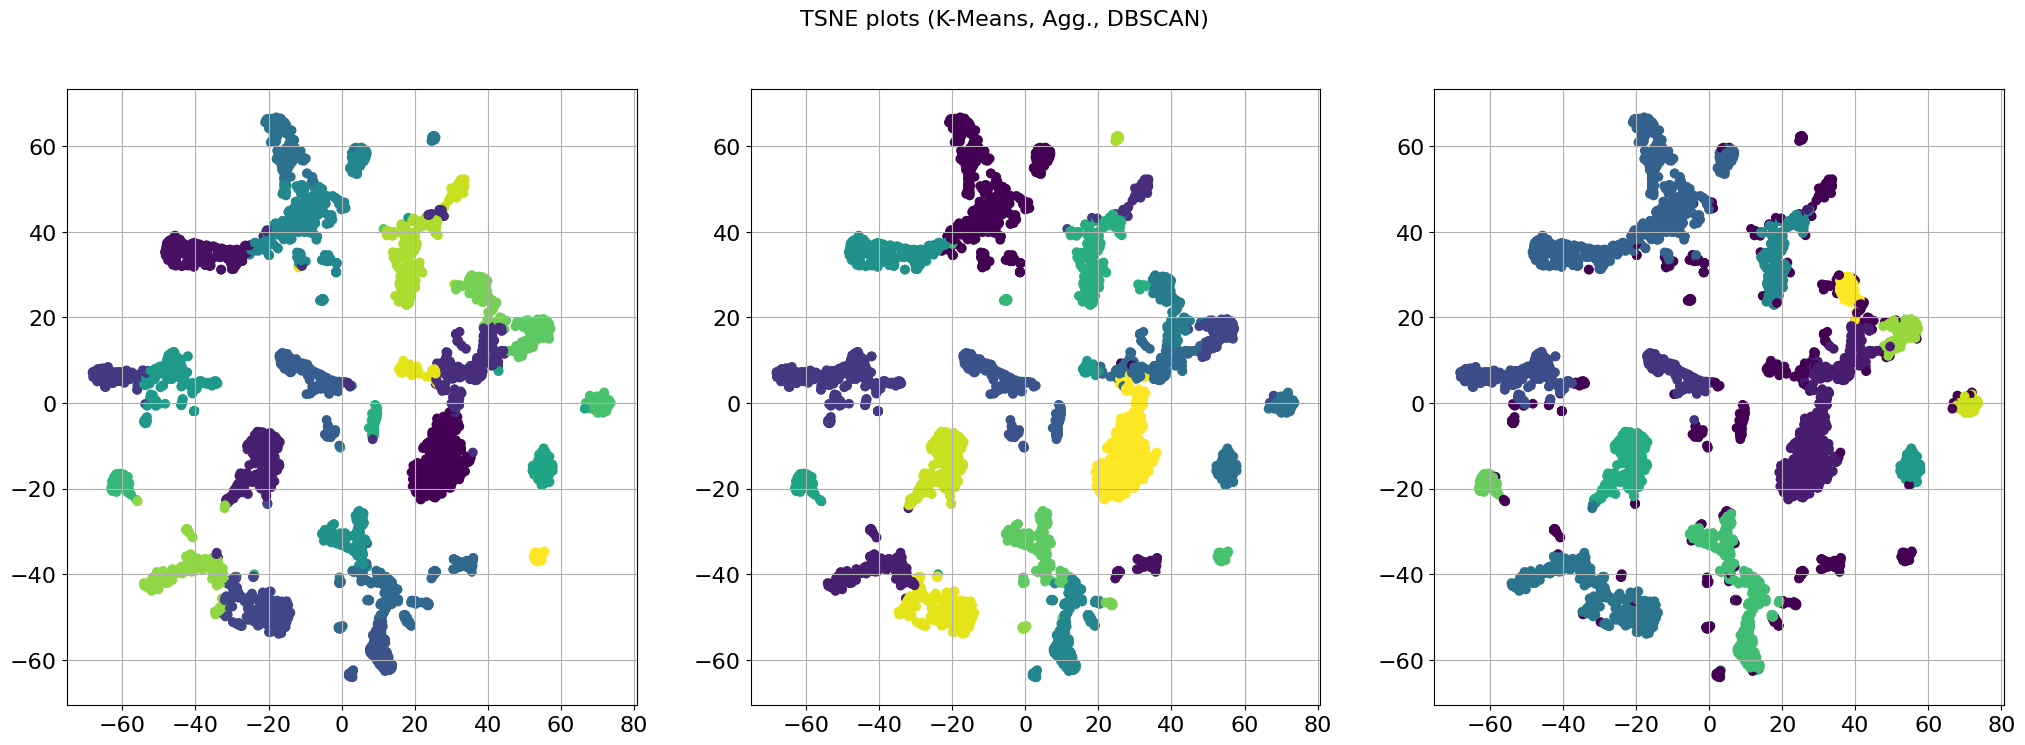

In [144]:
plt.figure()

fig, axs = plt.subplots(1,3, figsize=(25,8))
fig.suptitle("TSNE plots (K-Means, Agg., DBSCAN)", fontsize=16)
sl_kmsearch.tsne_plot(X, axs[0])
sl_amsearch.tsne_plot(X, axs[1])
db_tsne_plot(X, results['labx'], axs[2])

plt.show()


In [148]:
import pandas as pd 
pd.DataFrame([
    {
        "algo": "K-Means", 
        "clusters": km_scoring_df.iloc[0]["clusters"], 
        "sl_score": km_scoring_df.iloc[0]["sl_score"], 
        "ch_score": km_scoring_df.iloc[0]["ch_score"], 
        "db_score": km_scoring_df.iloc[0]["db_score"],
    },
    {
        "algo": "Aggl.", 
        "clusters": am_scoring_df.iloc[0]["clusters"], 
        "sl_score": am_scoring_df.iloc[0]["sl_score"], 
        "ch_score": am_scoring_df.iloc[0]["ch_score"], 
        "db_score": am_scoring_df.iloc[0]["db_score"],
    },
    {
        "algo": "DBSCAN", 
        "clusters": dbs_scoring_df.iloc[0]["clusters"], 
        "sl_score": dbs_scoring_df.iloc[0]["sl_score"], 
        "ch_score": dbs_scoring_df.iloc[0]["ch_score"], 
        "db_score": dbs_scoring_df.iloc[0]["db_score"],
    }
])

algo  clusters  sl_score    ch_score  db_score
0  K-Means      25.0  0.462347  936.849877  0.849027
1    Aggl.      25.0  0.468137  778.192620  0.813410
2   DBSCAN      13.0  0.333527  426.268663  1.538967

#### Feature Extraction:
    Node2Vec algorithm is leveraged to extract the features. I used low p(=0.5) and higher q(=4) to keep the walks closer to the node and explore local neighborhood to find the nodes with similar structural properties. 

    I did a grid search over the walk_length (l) and num_walks (r) parameters keeping the default dimensions & window size. In order to evaluate the extracted features I used K-Means algorithm with silhouette scorer. On the contratry to the node2vec research paper the optimal silhouette score was found at l=16 and r=4 and the score dropped as I increased the values.

#### Clustering algorithms:
    I did a grid search on three clustering algorithms K-Means, Agglomerative & DBSCAN over the features extracted with results of the node2vec grid search (d=128, l=16, r=4, k=5, p=0.5, q=4). The grid-search output was evaluated against the three scores - silhouette cofficient (slcoff.), Calinski Harabasz index (chindex) and Davies Bouldin index (dbindex). 

##### Davies Bouldin index:
    Across all the three clustering algorithms, dbindex seems to improve as we increase the number of clusters but the corresponding TSNE scores seems to have overlapping clusters.

##### K-Means and Agglomerative algorithms:
    Both algos resulted in highest silhouette score of 0.46 and number of clusters of 25 when grid search over silhouette scorer and distance measure of cosine and ecludiean. The corresponding TSNE plots were similar. We can plot the silhouette scores per cluster to see which clusters contribute to lower score and make the differences between the two. 

    K-Means algorithm grid-search over dbindex seems to provide a closer silhouette score and number of clusters but Agglomerative algorithm resulted in a high number of clusters with a slightly lower silhouette score.

##### DBSCAN
    DBSCAN resulted in lower silhouette score  (0.33) and numer of clusters (13) compared to other two clustering algorithms. The corresponding TSNE plot show overlapping clusters. 

#### Conclusion: 
    In the abscence of ground truth labels its very hard to evaluate the results. In these situation we fall on the intrinsic measures to evaluate the clusters. Going based on similarity & majority of scores across three clustering algorithms we can consider both K-Means & Agglomerative models and do a A/B test with actual business use case to better understand better which model performs well.
